In [28]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, precision_recall_curve, roc_auc_score, average_precision_score
from statsmodels.tsa.arima.model import ARIMA
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import RFE

In [29]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [30]:
file_name = "heart_failure_clinical_records_dataset.csv"
df = pd.read_csv(file_name)

In [31]:
df.head(10)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
5,90.0,1,47,0,40,1,204000.00,2.1,132,1,1,8,1
6,75.0,1,246,0,15,0,127000.00,1.2,137,1,0,10,1
7,60.0,1,315,1,60,0,454000.00,1.1,131,1,1,10,1
8,65.0,0,157,0,65,0,263358.03,1.5,138,0,0,10,1
9,80.0,1,123,0,35,1,388000.00,9.4,133,1,1,10,1


In [32]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,299.0,60.833893,11.894809,40.0,51.0,60.0,70.0,95.0
anaemia,299.0,0.431438,0.496107,0.0,0.0,0.0,1.0,1.0
creatinine_phosphokinase,299.0,581.839465,970.287881,23.0,116.5,250.0,582.0,7861.0
diabetes,299.0,0.418060,0.494067,0.0,0.0,0.0,1.0,1.0
ejection_fraction,299.0,38.083612,11.834841,14.0,30.0,38.0,45.0,80.0
high_blood_pressure,299.0,0.351171,0.478136,0.0,0.0,0.0,1.0,1.0
platelets,299.0,263358.029264,97804.236869,25100.0,212500.0,262000.0,303500.0,850000.0
serum_creatinine,299.0,1.393880,1.034510,0.5,0.9,1.1,1.4,9.4
serum_sodium,299.0,136.625418,4.412477,113.0,134.0,137.0,140.0,148.0
sex,299.0,0.648829,0.478136,0.0,0.0,1.0,1.0,1.0


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [34]:
df.isnull().sum(axis=0)

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [35]:
X = df.drop(['DEATH_EVENT', 'time'], axis=1)  # Features (excluding target and time variable)
y = df['DEATH_EVENT']  # Target variable

In [36]:
# Handling class imbalance using SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

In [37]:
X_resampled.head()


,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0


In [38]:
y_resampled


0      1
1      1
2      1
3      1
4      1
      ..
401    1
402    1
403    1
404    1
405    1
Name: DEATH_EVENT, Length: 406, dtype: int64

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [40]:
# Display the shapes of the split datasets
print("\nShapes of the split datasets:")
print("X_train:", X_train.shape)
print("X_test:", X_test.shape)
print("y_train:", y_train.shape)
print("y_test:", y_test.shape)


Shapes of the split datasets:
X_train: (239, 11)
X_test: (60, 11)
y_train: (239,)
y_test: (60,)


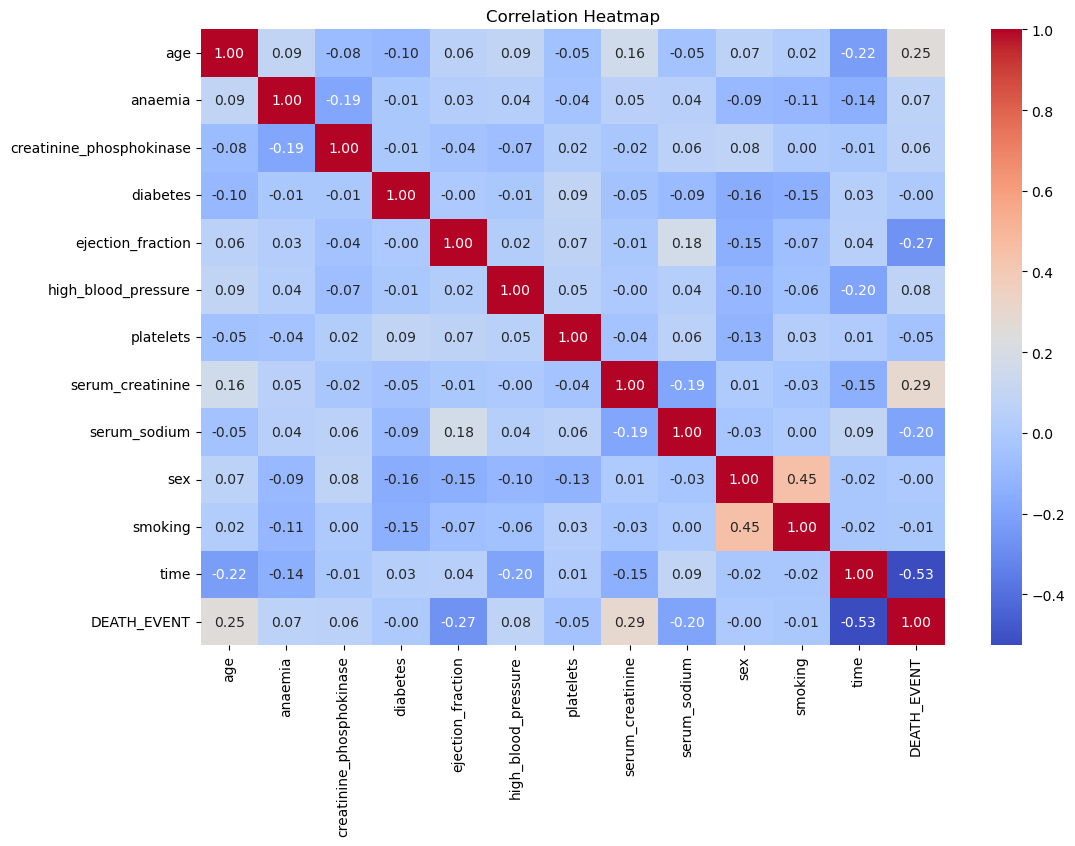

In [41]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [42]:
# Initialize the StandardScaler
scaler = StandardScaler()

In [43]:
# Fit the scaler on the training features and transform them
X_train_scaled = scaler.fit_transform(X_train)

# Transform the testing features using the same scaler
X_test_scaled = scaler.transform(X_test)

In [44]:
# Feature selection using RFE
log_reg = LogisticRegression(max_iter=1000)
rfe = RFE(log_reg, n_features_to_select=8)
rfe.fit(X_train_scaled, y_train)

RFE(estimator=LogisticRegression(max_iter=1000), n_features_to_select=8)

In [45]:
# Transforming the data with selected features
X_train_rfe = rfe.transform(X_train_scaled)
X_test_rfe = rfe.transform(X_test_scaled)

In [46]:
# Define classifiers
classifiers = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Support Vector Machine": SVC(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB(),
    "Multi-layer Perceptron": MLPClassifier(),
}

In [47]:
# Define evaluation metrics
metrics = {'accuracy': accuracy_score, 'precision': precision_score, 'recall': recall_score, 'f1': f1_score}

In [48]:
# Initialize variables to store best model and its evaluation metrics
best_model = None
best_metrics = {metric: 0 for metric in metrics}

In [49]:
# Ignore specific warnings using the filterwarnings function
warnings.filterwarnings("ignore", category=FutureWarning)
# Iterate over each classifier
for name, classifier in classifiers.items():
    if name != 'LightGBM':  # Skip LightGBM classifier
        # Filter specific warnings for each classifier
        with warnings.catch_warnings():
            warnings.filterwarnings("ignore", category=Warning)
            
            # Define preprocessing and classifier pipeline
            pipeline = Pipeline([
                ('scaler', StandardScaler()),
                ('classifier', classifier)
            ])

            # Define hyperparameters grid for GridSearchCV
            if name in ['Random Forest']:
                param_grid = {
                    'classifier__n_estimators': [50, 100, 200],
                    'classifier__max_depth': [None, 10, 20, 30],
                    'classifier__min_samples_split': [2, 5, 10],
                    'classifier__min_samples_leaf': [1, 2, 4],
                    'classifier__max_features': ['sqrt']  # Set max_features explicitly to 'sqrt'
                }
            elif name in ['Gradient Boosting', 'XGBoost']:
                param_grid = {
                    'classifier__n_estimators': [50, 100, 200],
                    'classifier__learning_rate': [0.01, 0.1, 0.5],
                    'classifier__max_depth': [3, 5, 7]
                }
            elif name == 'Logistic Regression':
                param_grid = {
                    'classifier__C': [0.1, 1, 10],
                    'classifier__penalty': ['l1', 'l2']
                }
            elif name == 'Decision Tree':
                param_grid = {
                    'classifier__max_depth': [None, 10, 20, 30],
                    'classifier__min_samples_split': [2, 5, 10],
                    'classifier__min_samples_leaf': [1, 2, 4]
                }
            else:
                param_grid = {}

            # Perform grid search with cross-validation
            grid_search = GridSearchCV(pipeline, param_grid, cv=5, n_jobs=-1, verbose=0)  # Set verbose to 0
            grid_search.fit(X_train, y_train)

            # Evaluate the best model
            best_estimator = grid_search.best_estimator_
            y_pred = best_estimator.predict(X_test)

            # Calculate evaluation metrics
            metrics_values = {}
            for metric, func in metrics.items():
                metrics_values[metric] = func(y_test, y_pred)

            # Print evaluation metrics
            print(f"\nClassifier: {name}")
            for metric, value in metrics_values.items():
                print(f"{metric.capitalize()}: {value:.4f}")

            # Update best model if current model has higher accuracy
            if metrics_values['accuracy'] > best_metrics['accuracy']:
                best_model = best_estimator
                best_metrics = metrics_values
# Reset the warnings filter to its default state
warnings.filterwarnings("default")


Classifier: Logistic Regression
Accuracy: 0.6667
Precision: 0.8571
Recall: 0.2400
F1: 0.3750

Classifier: Decision Tree
Accuracy: 0.7000
Precision: 0.7333
Recall: 0.4400
F1: 0.5500

Classifier: Random Forest
Accuracy: 0.6833
Precision: 0.6875
Recall: 0.4400
F1: 0.5366

Classifier: Gradient Boosting
Accuracy: 0.6333
Precision: 0.6154
Recall: 0.3200
F1: 0.4211

Classifier: Support Vector Machine
Accuracy: 0.7000
Precision: 0.7692
Recall: 0.4000
F1: 0.5263

Classifier: K-Nearest Neighbors
Accuracy: 0.6667
Precision: 0.8571
Recall: 0.2400
F1: 0.3750

Classifier: Naive Bayes
Accuracy: 0.6333
Precision: 0.7143
Recall: 0.2000
F1: 0.3125

Classifier: Multi-layer Perceptron
Accuracy: 0.6500
Precision: 0.6667
Recall: 0.3200
F1: 0.4324


In [50]:
# Suppress specific warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)


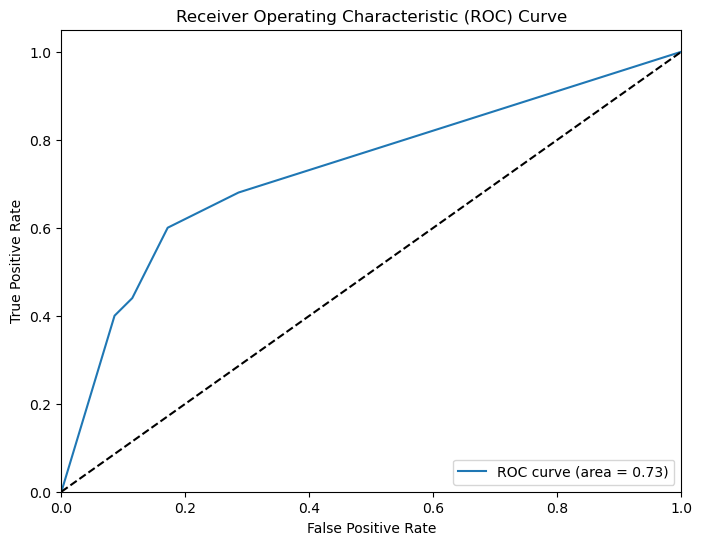

In [51]:
# ROC Curve
y_prob = best_model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc_score(y_test, y_prob))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

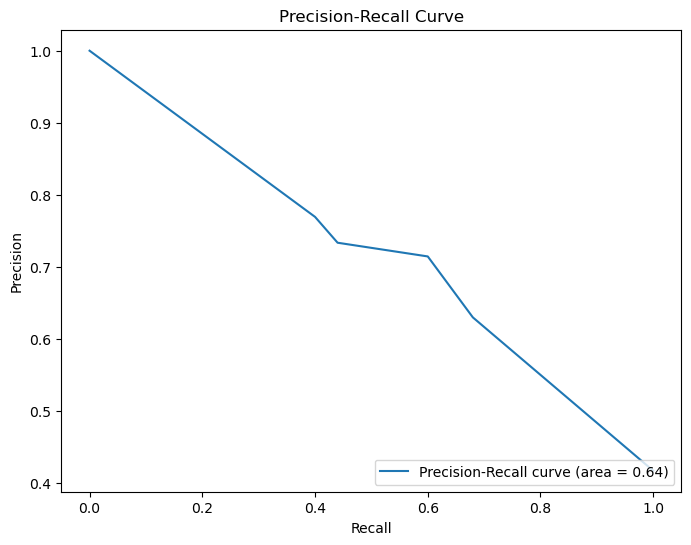

In [52]:
# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_prob)
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label='Precision-Recall curve (area = %0.2f)' % average_precision_score(y_test, y_prob))
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower right")
plt.show()

In [53]:
# Define hyperparameters grid for GridSearchCV with more parameters
param_grid = {
    'classifier__n_estimators': [100, 200, 300],
    'classifier__learning_rate': [0.1, 0.5, 1],
    'classifier__max_depth': [3, 5, 7],
    'classifier__min_samples_split': [2, 5, 10]
}

In [54]:
# Define hyperparameters grid for GridSearchCV
if name == 'Logistic Regression':
    param_grid = {
        'classifier__C': [0.1, 1, 10],
        'classifier__penalty': ['l1', 'l2']
    }
else:
    param_grid = {}

In [55]:
# Suppress specific warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [56]:
# Print the best parameters and its accuracy
print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)

Best Parameters: {}
Best Accuracy: 0.702659574468085


In [57]:
# Define separate parameter grids for different solvers
param_grid = [
    {'solver': ['liblinear'], 'penalty': ['l1', 'l2'], 'C': [0.1, 1, 10, 100], 'max_iter': [100, 200, 300]},
    {'solver': ['lbfgs'], 'penalty': ['l2'], 'C': [0.1, 1, 10, 100], 'max_iter': [100, 200, 300]}
]

In [58]:
# Perform grid search with cross-validation
grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_rfe, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid=[{'C': [0.1, 1, 10, 100], 'max_iter': [100, 200, 300],
                          'penalty': ['l1', 'l2'], 'solver': ['liblinear']},
                         {'C': [0.1, 1, 10, 100], 'max_iter': [100, 200, 300],
                          'penalty': ['l2'], 'solver': ['lbfgs']}],
             scoring='accuracy')

In [59]:
# Output the best parameters and the best score
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best cross-validation accuracy: {grid_search.best_score_}")

Best parameters: {'C': 1, 'max_iter': 100, 'penalty': 'l1', 'solver': 'liblinear'}
Best cross-validation accuracy: 0.7696808510638298


In [60]:
# Best parameters
print("Best parameters found: ", grid_search.best_params_)

Best parameters found:  {'C': 1, 'max_iter': 100, 'penalty': 'l1', 'solver': 'liblinear'}


In [61]:
# Train the Logistic Regression model with the best parameters
best_log_reg = grid_search.best_estimator_
best_log_reg.fit(X_train_rfe, y_train)

LogisticRegression(C=1, penalty='l1', solver='liblinear')

In [62]:
# Predict on the test data
y_pred = best_log_reg.predict(X_test_rfe)

In [63]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

In [64]:
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"ROC AUC Score: {roc_auc:.2f}")

Accuracy: 0.65
Precision: 0.75
Recall: 0.24
F1 Score: 0.36
ROC AUC Score: 0.59


In [65]:
# Cross-validation score
cv_scores = cross_val_score(best_log_reg, X_train_rfe, y_train, cv=5, scoring='accuracy')
print(f"Cross-validation accuracy: {cv_scores.mean():.2f} ± {cv_scores.std():.2f}")

Cross-validation accuracy: 0.77 ± 0.04
